In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix

from apyori import apriori

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


In [2]:
sns.set_style("darkgrid")


In [3]:
mtcars = pd.DataFrame(pd.read_csv("mtcars.csv", delimiter=","))

mtcars = mtcars.rename(index = mtcars.iloc[:, 0])
del mtcars["Unnamed: 0"]

mtcars1 = mtcars.copy()
mtcars1 = mtcars.iloc[:, 3:5]
display(mtcars1)


,hp,drat
Mazda RX4,110,3.90
Mazda RX4 Wag,110,3.90
Datsun 710,93,3.85
Hornet 4 Drive,110,3.08
Hornet Sportabout,175,3.15
Valiant,105,2.76
Duster 360,245,3.21
Merc 240D,62,3.69
Merc 230,95,3.92
Merc 280,123,3.92


In [4]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

kmeans_result1, centers = doKmeans(mtcars1)
print(confusion_matrix(mtcars["vs"], kmeans_result1))

[[ 5 13]
 [14  0]]


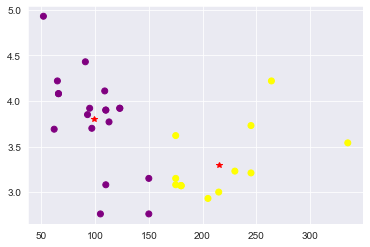

In [5]:
def color_code(targets):
    code = {
        0: 'purple',
        1: 'yellow',
    }

    return [code[target] for target in targets]


plt.scatter(mtcars1["hp"], mtcars1["drat"], c=color_code(kmeans_result1))
plt.plot(centers[:, 0], centers[:, 1], '*r')
plt.show()

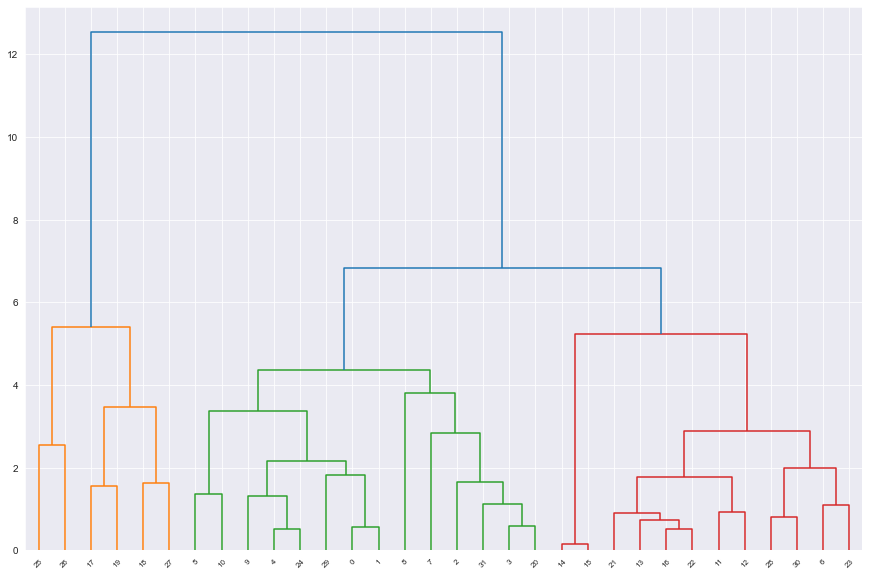

In [6]:
mtcars2 = mtcars[["mpg", "qsec"]]

hc2 = AgglomerativeClustering(linkage="average", n_clusters=3).fit(mtcars2)
mtcars["groups"] = hc2.labels_

plt.figure(figsize=(15, 10))
dend = dendrogram(linkage(mtcars2, method='average'), color_threshold=6)


In [7]:
AdultUCI = pd.DataFrame(pd.read_csv("AdultUCI.csv"))


AdultUCI = AdultUCI.rename(index = AdultUCI.iloc[:, 0])
del AdultUCI["Unnamed: 0"]


AdultUCI1 = AdultUCI.select_dtypes(include="object")
AdultUCI1 = AdultUCI1.astype('category')
display(AdultUCI1)


C:\Users\root\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
1,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,small
2,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,small
3,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,small
4,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,small
5,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,small
...,...,...,...,...,...,...,...,...,...
48838,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,NaN
48839,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,NaN
48840,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,NaN
48841,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,NaN


In [8]:
rules1 = apriori(AdultUCI1, min_support=0.01, use_colnames=True, min_confidence=0.68,
                 min_length=4)

rules1_sorted = list(rules1)
print(len(rules1_sorted))

print(rules1_sorted[1])
contains_duplicates = any(rules1_sorted.count(element) > 1 for element in rules1_sorted)

print(contains_duplicates)

rules1_sorted.sort(key = lambda rules1_sorted: rules1_sorted[2])


6917
RelationRecord(items=frozenset({'-', 'a'}), support=0.2222222222222222, ordered_statistics=[OrderedStatistic(items_base=frozenset({'-'}), items_add=frozenset({'a'}), confidence=1.0, lift=1.2857142857142856)])
False
